In [ ]:
import scanpy as sc
import numpy as np 
import pandas as pd
from pathlib import Path

In [2]:
DATA_DIR = Path('/lustre/groups/ml01/workspace/alessandro.palma/Attribute_genes_alignment_sc')

The dataset has 354k cells by 977 genes (already subsetted to account for highly variable)

In [3]:
adata = sc.read_h5ad(DATA_DIR / 'datasets' / 'chemCPA'/ 'sciplex_complete_middle_subset.h5ad')
adata

AnnData object with n_obs × n_vars = 354640 × 2000
    obs: 'cell_type', 'dose', 'dose_character', 'dose_pattern', 'g1s_score', 'g2m_score', 'pathway', 'pathway_level_1', 'pathway_level_2', 'product_dose', 'product_name', 'proliferation_index', 'replicate', 'size_factor', 'target', 'vehicle', 'batch', 'n_counts', 'dose_val', 'condition', 'drug_dose_name', 'cov_drug_dose_name', 'cov_drug', 'control', 'split_ho_pathway', 'split_tyrosine_ood', 'split_epigenetic_ood', 'split_cellcycle_ood', 'SMILES', 'split_ood_finetuning', 'split_ho_epigenetic', 'split_ho_epigenetic_all', 'split_random'
    var: 'id', 'num_cells_expressed-0-0', 'num_cells_expressed-1-0', 'num_cells_expressed-1', 'gene_id', 'in_lincs', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'all_DEGs', 'hvg', 'lincs_DEGs', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

There are 188 different drugs 

In [4]:
adata.obs.product_name.unique()

['Enzastaurin', 'control', 'Divalproex', 'MLN8054', 'Sodium', ..., 'Ofloxacin', 'Givinostat', 'Thiotepa', 'Rucaparib', 'PHA-680632']
Length: 188
Categories (188, object): ['2-Methoxyestradiol', '(+)-JQ1', 'A-366', 'ABT-737', ..., 'YM155', 'ZM', 'Zileuton', 'control']

But there are 749 unique combinations of drug+dose

In [5]:
len(adata.obs.groupby(['dose', 'product_name']).indices)

749

**Dataset description**

The dataset profiles 3 different cell lines with different genetic make up.

A549: lung carcinoma \
K562: myelogenous leukemia\
MCF7: breast cancer

In [6]:
adata.obs.cell_type.unique().categories

Index(['A549', 'K562', 'MCF7'], dtype='object')

In [7]:
adata.obs[['product_name', 'dose', 'batch', 'drug_dose_name', 'cov_drug', 'control', 'SMILES']]

,product_name,dose,batch,drug_dose_name,cov_drug,control,SMILES
index,,,,,,,
A01_E09_RT_BC_100_Lig_BC_245-0-0-0,Enzastaurin,1000.0,0,Enzastaurin_0.1,A549_Enzastaurin,0,Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)...
A01_E09_RT_BC_101_Lig_BC_109-0-0-0,control,0.0,0,control_1.0,A549_control,1,CS(C)=O
A01_E09_RT_BC_101_Lig_BC_280-0-0-0,Divalproex,1000.0,0,Divalproex_0.1,A549_Divalproex,0,CCCC(CCC)C(=O)O.CCCC(CCC)C(=O)[O-].[Na+]
A01_E09_RT_BC_101_Lig_BC_86-0-0-0,MLN8054,100.0,0,MLN8054_0.01,A549_MLN8054,0,O=C(O)c1ccc(Nc2ncc3c(n2)-c2ccc(Cl)cc2C(c2c(F)c...
A01_E09_RT_BC_102_Lig_BC_215-0-0-0,Sodium,1000.0,0,Sodium_0.1,A549_Sodium,0,O=C(CCCc1ccccc1)O[Na]
...,...,...,...,...,...,...,...
H12_F10_RT_BC_8_Lig_BC_55-1-4,Busulfan,100.0,4,Busulfan_0.01,K562_Busulfan,0,CS(=O)(=O)OCCCCOS(C)(=O)=O
H12_F10_RT_BC_93_Lig_BC_202-1-4,control,0.0,4,control_1.0,K562_control,1,CS(C)=O
H12_F10_RT_BC_97_Lig_BC_224-1-4,Ivosidenib,100.0,4,Ivosidenib_0.01,K562_Ivosidenib,0,N#Cc1ccnc(N2C(=O)CCC2C(=O)N(c2cncc(F)c2)C(C(=O...


Each cell comes with a series of metadata: 
* A drug (```product_name```)
* A dosage for the drug
* A batch (there are four and can be source of variation) 
* A binary array stating if a cell is a control or not 
* SMILES for the drugs (can be encoded into an attribute space) 

The highly variable genes are also already computed for the cells and thet will constitute the feature space

In [8]:
hv = adata.var.highly_variable
print(f'\nNumber of highly-variable genes: {np.sum(hv)}')


Number of highly-variable genes: 2000


The authors of chemCPA have aleady collected differentially expressed gene names for each treatment (drug+dosage) and saved them in a dictionary (interesting for downstream analysis)

In [9]:
print({key:val for key, val in list(adata.uns['all_DEGs'].items())[:3]})

{'A549_(+)-JQ1_0.001': array(['HNF1A-AS1', 'FTL', 'TXNRD1', 'PDE10A', 'RBFOX3', 'CSGALNACT1',
       'GAPDH', 'G6PD', 'LINC00511', 'MUC5AC', 'KRT81', 'CNTN1', 'MTUS1',
       'SQSTM1', 'MYO1E', 'ABCC3', 'TNS3', 'ABCC2', 'TBC1D8', 'PDE3A',
       'CACNA2D1', 'FN1', 'MYO10', 'PTPRM', 'PDE4D', 'ALDH3A1', 'GLIS3',
       'FAM107B', 'BACH2', 'AC099520.1', 'PDE4B', 'LRP10', 'ZBTB20',
       'MAP7', 'CYP24A1', 'ADGRG1', 'ADI1', 'GRB7', 'FAH', 'ALDOA',
       'FCGBP', 'FHIT', 'VCAN', 'IGFBP3', 'PLA2G4A', 'NTRK3', 'MLLT11',
       'TFPI2', 'EDN1', 'LPGAT1'], dtype=object), 'A549_(+)-JQ1_0.01': array(['HNF1A-AS1', 'FTL', 'TXNRD1', 'PDE10A', 'RBFOX3', 'CSGALNACT1',
       'GAPDH', 'G6PD', 'LINC00511', 'MUC5AC', 'KRT81', 'CNTN1', 'MTUS1',
       'SQSTM1', 'MYO1E', 'ABCC3', 'TNS3', 'ABCC2', 'TBC1D8', 'PDE3A',
       'CACNA2D1', 'FN1', 'MYO10', 'PTPRM', 'PDE4D', 'ALDH3A1', 'GLIS3',
       'FAM107B', 'BACH2', 'AC099520.1', 'PDE4B', 'LRP10', 'ZBTB20',
       'MAP7', 'CYP24A1', 'ADGRG1', 'ADI1', 'GRB7'

PCA and UMAP are already computed and stored

In [10]:
adata.obsm['X_pca'].shape

(354640, 25)

Cell lines are very different in expression profile

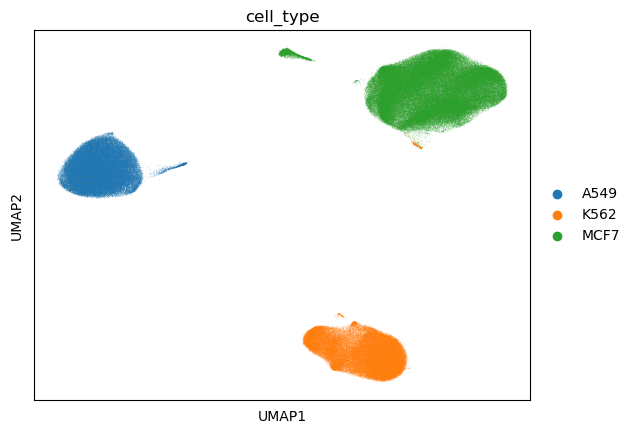

In [11]:
sc.pl.umap(adata, color=['cell_type'])

But batch is nicely corrected within cell lines 

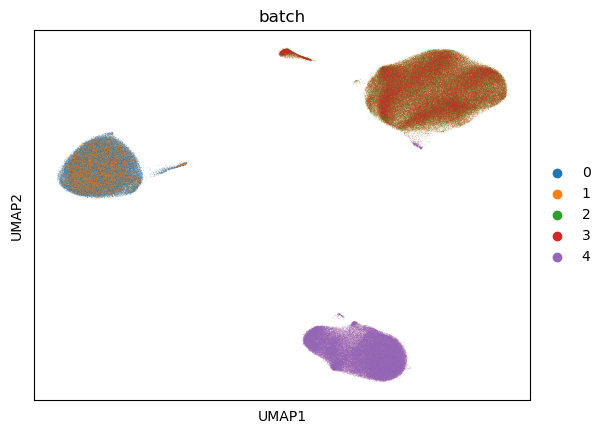

In [12]:
sc.pl.umap(adata, color=['batch'])

In [23]:
for i in np.unique(adata.obs.product_name):
    print(i)

(+)-JQ1
2-Methoxyestradiol
A-366
ABT-737
AC480
AG-14361
AG-490
AICAR
AMG-900
AR-42
AT9283
AZ
AZD1480
Abexinostat
Alendronate
Alisertib
Altretamine
Alvespimycin
Aminoglutethimide
Amisulpride
Anacardic
Andarine
Aurora
Avagacestat
Azacitidine
BMS-265246
BMS-536924
BMS-754807
BMS-911543
BRD4770
Barasertib
Baricitinib
Belinostat
Bisindolylmaleimide
Bosutinib
Busulfan
CEP-33779
CUDC-101
CUDC-907
CYC116
Capecitabine
Carmofur
Cediranib
Celecoxib
Cerdulatinib
Cimetidine
Clevudine
Costunolide
Crizotinib
Curcumin
Cyclocytidine
Dacinostat
Danusertib
Daphnetin
Dasatinib
Decitabine
Disulfiram
Divalproex
Droxinostat
EED226
ENMD-2076
Ellagic
Entacapone
Entinostat
Enzastaurin
Epothilone
FLLL32
Fasudil
Fedratinib
Filgotinib
Flavopiridol
Fluorouracil
Fulvestrant
G007-LK
GSK
GSK-LSD1
GSK1070916
Gandotinib
Givinostat
Glesatinib?(MGCD265)
Hesperadin
INO-1001
IOX2
ITSA-1
Iniparib
Ivosidenib
JNJ-26854165
JNJ-7706621
KW-2449
Ki16425
Ki8751
Lapatinib
Lenalidomide
Linifanib
Lomustine
Luminespib
M344
MC1568
MK-07

Also cel-cell graphs are stored from pre-processing

In [13]:
adata.obsp['distances']

<354640x354640 sparse matrix of type '<class 'numpy.float64'>'
	with 10573979 stored elements in Compressed Sparse Row format>